In [20]:
import pandas as pd 
import functions
import plotly.graph_objects as go
import calendar
from datetime import datetime, timedelta, date
import numpy as np
import functions as function


from matplotlib import pyplot as plt

In [2]:
pair = "EUR_USD"
granularity = "H1"

In [3]:
df = pd.read_pickle(function.get_data_filename(pair, granularity))

In [4]:
non_cols = ["time", "volume"]
mod_cols = [x for x in df.columns if x not in non_cols]
df[mod_cols] = df[mod_cols].apply(pd.to_numeric)
df

df["date"] = df.loc[:, "time"]


In [5]:
df

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,date
0,2010-01-03T17:00:00.000000000Z,3,1.43120,1.43172,1.43120,1.43172,1.43070,1.43097,1.43045,1.43097,1.43170,1.43247,1.43170,1.43247,2010-01-03T17:00:00.000000000Z
1,2010-01-03T18:00:00.000000000Z,137,1.43172,1.43425,1.43105,1.43157,1.43097,1.43325,1.43005,1.43092,1.43247,1.43525,1.43177,1.43222,2010-01-03T18:00:00.000000000Z
2,2010-01-03T19:00:00.000000000Z,299,1.43154,1.43212,1.43081,1.43106,1.43089,1.43147,1.43016,1.43066,1.43219,1.43277,1.43146,1.43146,2010-01-03T19:00:00.000000000Z
3,2010-01-03T20:00:00.000000000Z,261,1.43103,1.43201,1.43076,1.43080,1.43063,1.43161,1.43029,1.43045,1.43143,1.43241,1.43111,1.43115,2010-01-03T20:00:00.000000000Z
4,2010-01-03T21:00:00.000000000Z,327,1.43078,1.43114,1.42926,1.43036,1.43043,1.43079,1.42909,1.43016,1.43113,1.43149,1.42944,1.43056,2010-01-03T21:00:00.000000000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2020-12-31T17:00:00.000000000Z,3940,1.22302,1.22348,1.22219,1.22253,1.22296,1.22340,1.22210,1.22246,1.22309,1.22355,1.22226,1.22260,2020-12-31T17:00:00.000000000Z
306,2020-12-31T18:00:00.000000000Z,2522,1.22254,1.22280,1.22151,1.22169,1.22247,1.22273,1.22143,1.22163,1.22261,1.22288,1.22157,1.22175,2020-12-31T18:00:00.000000000Z
307,2020-12-31T19:00:00.000000000Z,2214,1.22167,1.22230,1.22094,1.22100,1.22158,1.22225,1.22076,1.22094,1.22176,1.22238,1.22099,1.22107,2020-12-31T19:00:00.000000000Z
308,2020-12-31T20:00:00.000000000Z,1671,1.22102,1.22194,1.22100,1.22162,1.22094,1.22188,1.22091,1.22154,1.22111,1.22200,1.22106,1.22170,2020-12-31T20:00:00.000000000Z


In [6]:

start_date = df['time']
enddate = pd.to_datetime(start_date) 

df['time'] = enddate



In [7]:
df = df.drop(['volume', 'mid_o','mid_h', 'mid_l', 'mid_c','bid_o','bid_h','bid_l','bid_c' ], 1)

/var/folders/b3/36sh0m6j02gf5gxpnjwpkxv80000gn/T/ipykernel_10880/1054733313.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['volume', 'mid_o','mid_h', 'mid_l', 'mid_c','bid_o','bid_h','bid_l','bid_c' ], 1)


In [8]:


df.date = df.date.str[:-20]


df

,time,ask_o,ask_h,ask_l,ask_c,date
0,2010-01-03 17:00:00+00:00,1.43170,1.43247,1.43170,1.43247,2010-01-03
1,2010-01-03 18:00:00+00:00,1.43247,1.43525,1.43177,1.43222,2010-01-03
2,2010-01-03 19:00:00+00:00,1.43219,1.43277,1.43146,1.43146,2010-01-03
3,2010-01-03 20:00:00+00:00,1.43143,1.43241,1.43111,1.43115,2010-01-03
4,2010-01-03 21:00:00+00:00,1.43113,1.43149,1.42944,1.43056,2010-01-03
...,...,...,...,...,...,...
305,2020-12-31 17:00:00+00:00,1.22309,1.22355,1.22226,1.22260,2020-12-31
306,2020-12-31 18:00:00+00:00,1.22261,1.22288,1.22157,1.22175,2020-12-31
307,2020-12-31 19:00:00+00:00,1.22176,1.22238,1.22099,1.22107,2020-12-31
308,2020-12-31 20:00:00+00:00,1.22111,1.22200,1.22106,1.22170,2020-12-31


In [9]:

start_date = df["date"]

enddate = pd.to_datetime(start_date)

df["date"] = enddate

In [10]:
df


,time,ask_o,ask_h,ask_l,ask_c,date
0,2010-01-03 17:00:00+00:00,1.43170,1.43247,1.43170,1.43247,2010-01-03
1,2010-01-03 18:00:00+00:00,1.43247,1.43525,1.43177,1.43222,2010-01-03
2,2010-01-03 19:00:00+00:00,1.43219,1.43277,1.43146,1.43146,2010-01-03
3,2010-01-03 20:00:00+00:00,1.43143,1.43241,1.43111,1.43115,2010-01-03
4,2010-01-03 21:00:00+00:00,1.43113,1.43149,1.42944,1.43056,2010-01-03
...,...,...,...,...,...,...
305,2020-12-31 17:00:00+00:00,1.22309,1.22355,1.22226,1.22260,2020-12-31
306,2020-12-31 18:00:00+00:00,1.22261,1.22288,1.22157,1.22175,2020-12-31
307,2020-12-31 19:00:00+00:00,1.22176,1.22238,1.22099,1.22107,2020-12-31
308,2020-12-31 20:00:00+00:00,1.22111,1.22200,1.22106,1.22170,2020-12-31


In [11]:

df['time'] = df['time'].dt.strftime('%-H')

df['day'] = df['date'].dt.strftime('%A')
df['week'] = df['date'].dt.strftime('%U')
df['year'] = df['date'].dt.strftime('%G') 
df['month'] = df['date'].dt.strftime('%m') 



list = df.loc[df['day'] == 'Saturday'] 

list = list.index
df = df.drop(list)



In [13]:
list = df.loc[df['day'] == 'Sunday'] 

list = list.index
df = df.drop(list)

df.tail(30)

#NY time is GMT -5 on here 


,time,ask_o,ask_h,ask_l,ask_c,date,day,week,year,month
116,20,1.22432,1.22496,1.22371,1.22468,2020-12-18,Friday,50,2020,12
117,21,1.22467,1.22629,1.22455,1.22613,2020-12-18,Friday,50,2020,12
160,16,1.21747,1.21814,1.21614,1.21729,2020-12-22,Tuesday,51,2020,12
161,17,1.21727,1.21794,1.21676,1.21753,2020-12-22,Tuesday,51,2020,12
176,8,1.21980,1.21984,1.21729,1.21895,2020-12-23,Wednesday,51,2020,12
177,9,1.21893,1.22005,1.21872,1.21946,2020-12-23,Wednesday,51,2020,12
185,17,1.21940,1.21982,1.21814,1.21875,2020-12-23,Wednesday,51,2020,12
186,18,1.21875,1.21896,1.21806,1.21824,2020-12-23,Wednesday,51,2020,12
187,19,1.21824,1.21854,1.21731,1.21812,2020-12-23,Wednesday,51,2020,12
188,20,1.21815,1.21971,1.21741,1.21962,2020-12-23,Wednesday,51,2020,12


In [14]:

df.reset_index(inplace=True)

df.tail(30)

,index,time,ask_o,ask_h,ask_l,ask_c,date,day,week,year,month
14701,116,20,1.22432,1.22496,1.22371,1.22468,2020-12-18,Friday,50,2020,12
14702,117,21,1.22467,1.22629,1.22455,1.22613,2020-12-18,Friday,50,2020,12
14703,160,16,1.21747,1.21814,1.21614,1.21729,2020-12-22,Tuesday,51,2020,12
14704,161,17,1.21727,1.21794,1.21676,1.21753,2020-12-22,Tuesday,51,2020,12
14705,176,8,1.21980,1.21984,1.21729,1.21895,2020-12-23,Wednesday,51,2020,12
14706,177,9,1.21893,1.22005,1.21872,1.21946,2020-12-23,Wednesday,51,2020,12
14707,185,17,1.21940,1.21982,1.21814,1.21875,2020-12-23,Wednesday,51,2020,12
14708,186,18,1.21875,1.21896,1.21806,1.21824,2020-12-23,Wednesday,51,2020,12
14709,187,19,1.21824,1.21854,1.21731,1.21812,2020-12-23,Wednesday,51,2020,12
14710,188,20,1.21815,1.21971,1.21741,1.21962,2020-12-23,Wednesday,51,2020,12


In [15]:
df['week'] = df['week'].astype(int)
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['time'] = df['time'].astype(int)

In [ ]:
#https://stackoverflow.com/questions/45422739/gps-time-in-weeks-since-epoch-in-python
def epoch_week_number(day):

    epoch = date(1980, 1, 6)

    epochMonday = epoch - timedelta(epoch.weekday())
    dayMonday = day - timedelta(day.weekday())

    noWeeks = (dayMonday - epochMonday).days / 7

    







In [18]:
df2 = df.groupby('week').agg({'ask_h':['max']})

In [19]:
df2

,ask_h
,max
week,
0,1.37757
1,1.44740
2,1.45796
3,1.42884
4,1.41556
5,1.38622
6,1.37449
7,1.37759


In [29]:






days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

first_extreme = []
second_extreme = []
daily_range = []

for j in range(2010,2021): 
    for i in range (1,53): 
        for day in days: 

            list = df.loc[(df['week'] == i) & (df['day'] == day ) & (df['year'] == j)]
            print(list)
            if not(list.empty): 
                column = list['ask_h'] 
                column_2 = list['ask_l']
                max= column.idxmax()
                min = column_2.idxmin()

                max_val = column.max()
                min_val = column_2.min()

                d_range = abs(max_val-min_val) 

                df.loc[(df['day'] == day) & (df['week'] == i) & (df['year'] == j), 'daily_range'] = d_range

                

                if min < max:
                    day_1 = df.iloc[min,1]
                    first_extreme.append(day_1)

                    day_2 = df.iloc[max,1]
                    second_extreme.append(day_2)
                if max < min: 
                    day_1 = df.iloc[max,1]
                    first_extreme.append(day_1)

                    day_2 = df.iloc[min,1]
                    second_extreme.append(day_2)

                
                    
                list = df.loc[(df['week'] == i) & (df['day'] == day ) &  (df['year'] == j) & ((df['time'] > 0) & (df['time'] < 6)) ]

                column = list['ask_h']
                column_2 = list['ask_l']

                max_val = column.max()
                min_val = column_2.min()

                asian_range = abs(max_val-min_val) 
                asian_range = float(asian_range)

                df.loc[(df['day'] == day) & (df['week'] == i) & (df['year'] == j), 'asian_range'] = asian_range
                
                
                list = df.loc[(df['week'] == i) & (df['day'] == day ) &  (df['year'] == j)& ((df['time'] > 4) & (df['time'] < 11)) ]

                column = list['ask_h']
                column_2 = list['ask_l']

                max_val = column.max()
                min_val = column_2.min()


                london_range = abs(max_val-min_val) 
                london_range = float(london_range)

                df.loc[(df['day'] == day) & (df['week'] == i) & (df['year'] == j), 'london_range'] = london_range

                list = df.loc[(df['week'] == i) & (df['day'] == day ) &  (df['year'] == j) & ((df['time'] > 11) & (df['time'] < 17)) ]


                column = list['ask_h']
                column_2 = list['ask_l']


                max_val = column.max()
                min_val = column_2.min()


                ny_range = abs(max_val-min_val) 
                ny_range = float(ny_range)

                df.loc[(df['day'] == day) & (df['week'] == i) & (df['year'] == j), 'ny_range'] = ny_range







   index  time    ask_o    ask_h    ask_l    ask_c       date     day  week  \
0     12     5  1.42910  1.43096  1.42893  1.43019 2010-01-04  Monday     1   
1     13     6  1.43017  1.43101  1.42807  1.42961 2010-01-04  Monday     1   
2     24    17  1.44192  1.44227  1.44137  1.44156 2010-01-04  Monday     1   
3     25    18  1.44154  1.44287  1.44115  1.44134 2010-01-04  Monday     1   
4     26    19  1.44136  1.44281  1.44124  1.44124 2010-01-04  Monday     1   
5     27    20  1.44126  1.44228  1.44087  1.44120 2010-01-04  Monday     1   
6     28    21  1.44120  1.44162  1.44050  1.44136 2010-01-04  Monday     1   

   year  month  daily_range  asian_range  london_range  ny_range  hourly_range  
0  2010      1       0.0148      0.00203       0.00294       NaN       0.00203  
1  2010      1       0.0148      0.00203       0.00294       NaN       0.00294  
2  2010      1       0.0148      0.00203       0.00294       NaN       0.00090  
3  2010      1       0.0148      0.00203   

KeyboardInterrupt: 

In [16]:
first_extreme

[6,
 5,
 6,
 2,
 3,
 4,
 7,
 4,
 1,
 16,
 15,
 17,
 1,
 9,
 14,
 13,
 15,
 6,
 18,
 11,
 0,
 15,
 3,
 0,
 1,
 2,
 4,
 5,
 7,
 1,
 17,
 3,
 0,
 8,
 17,
 1,
 8,
 0,
 8,
 4,
 0,
 9,
 0,
 9,
 14,
 13,
 12,
 2,
 13,
 8,
 6,
 1,
 16,
 1,
 12,
 20,
 2,
 14,
 10,
 5,
 5,
 5,
 4,
 10,
 4,
 18,
 5,
 9,
 6,
 0,
 3,
 14,
 5,
 3,
 7,
 6,
 5,
 4,
 5,
 12,
 7,
 4,
 0,
 0,
 0,
 0,
 0,
 8,
 18,
 8,
 13,
 17,
 6,
 0,
 7,
 9,
 0,
 5,
 5,
 13,
 9,
 0,
 4,
 0,
 5,
 19,
 6,
 10,
 8,
 1,
 6,
 7,
 3,
 7,
 12,
 4,
 3,
 0,
 0,
 5,
 8,
 0,
 12,
 13,
 7,
 6,
 6,
 3,
 0,
 8,
 0,
 8,
 15,
 0,
 8,
 2,
 0,
 8,
 1,
 8,
 0,
 4,
 19,
 7,
 0,
 5,
 5,
 3,
 0,
 0,
 7,
 1,
 8,
 4,
 2,
 6,
 18,
 11,
 12,
 4,
 16,
 1,
 8,
 0,
 9,
 9,
 0,
 0,
 6,
 3,
 7,
 15,
 11,
 3,
 1,
 10,
 9,
 19,
 9,
 13,
 3,
 3,
 7,
 13,
 1,
 11,
 0,
 7,
 13,
 9,
 0,
 4,
 3,
 12,
 2,
 0,
 20,
 13,
 4,
 13,
 8,
 1,
 10,
 0,
 7,
 0,
 0,
 11,
 5,
 6,
 18,
 0,
 12,
 6,
 14,
 0,
 0,
 20,
 2,
 5,
 9,
 0,
 10,
 2,
 1,
 16,
 3,
 1,
 16,
 2,
 7,
 2,
 13,
 1,
 10

In [17]:
df.tail(26)

,index,time,ask_o,ask_h,ask_l,ask_c,date,day,week,year,month,daily_range,asian_range,london_range,ny_range
14705,176,8,1.21980,1.21984,1.21729,1.21895,2020-12-23,Wednesday,51,2020,12,0.00276,NaN,0.00276,NaN
14706,177,9,1.21893,1.22005,1.21872,1.21946,2020-12-23,Wednesday,51,2020,12,0.00276,NaN,0.00276,NaN
14707,185,17,1.21940,1.21982,1.21814,1.21875,2020-12-23,Wednesday,51,2020,12,0.00276,NaN,0.00276,NaN
14708,186,18,1.21875,1.21896,1.21806,1.21824,2020-12-23,Wednesday,51,2020,12,0.00276,NaN,0.00276,NaN
14709,187,19,1.21824,1.21854,1.21731,1.21812,2020-12-23,Wednesday,51,2020,12,0.00276,NaN,0.00276,NaN
14710,188,20,1.21815,1.21971,1.21741,1.21962,2020-12-23,Wednesday,51,2020,12,0.00276,NaN,0.00276,NaN
14711,192,0,1.21950,1.22058,1.21936,1.22031,2020-12-24,Thursday,51,2020,12,0.00333,0.00107,0.00122,0.00176
14712,193,1,1.22030,1.22131,1.22024,1.22092,2020-12-24,Thursday,51,2020,12,0.00333,0.00107,0.00122,0.00176
14713,202,10,1.21922,1.22011,1.21889,1.21997,2020-12-24,Thursday,51,2020,12,0.00333,0.00107,0.00122,0.00176
14714,203,11,1.21996,1.22044,1.21944,1.21961,2020-12-24,Thursday,51,2020,12,0.00333,0.00107,0.00122,0.00176


In [18]:
first_extreme = [str(x) for x in first_extreme] 
second_extreme = [str(x) for x in second_extreme] 

import collections

counter=collections.Counter(second_extreme)


second_extreme_dic = dict(counter)





<function matplotlib.pyplot.show(close=None, block=None)>

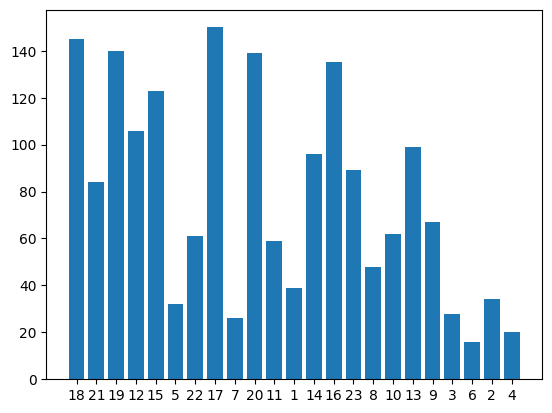

In [19]:
plt.bar(second_extreme_dic.keys(), second_extreme_dic.values())
plt.show

In [20]:


df['hourly_range'] = abs(df['ask_h'] - df['ask_l']) 

df.head(25)

,index,time,ask_o,ask_h,ask_l,ask_c,date,day,week,year,month,daily_range,asian_range,london_range,ny_range,hourly_range
0,12,5,1.42910,1.43096,1.42893,1.43019,2010-01-04,Monday,1,2010,1,0.01480,0.00203,0.00294,NaN,0.00203
1,13,6,1.43017,1.43101,1.42807,1.42961,2010-01-04,Monday,1,2010,1,0.01480,0.00203,0.00294,NaN,0.00294
2,24,17,1.44192,1.44227,1.44137,1.44156,2010-01-04,Monday,1,2010,1,0.01480,0.00203,0.00294,NaN,0.00090
3,25,18,1.44154,1.44287,1.44115,1.44134,2010-01-04,Monday,1,2010,1,0.01480,0.00203,0.00294,NaN,0.00172
4,26,19,1.44136,1.44281,1.44124,1.44124,2010-01-04,Monday,1,2010,1,0.01480,0.00203,0.00294,NaN,0.00157
5,27,20,1.44126,1.44228,1.44087,1.44120,2010-01-04,Monday,1,2010,1,0.01480,0.00203,0.00294,NaN,0.00141
6,28,21,1.44120,1.44162,1.44050,1.44136,2010-01-04,Monday,1,2010,1,0.01480,0.00203,0.00294,NaN,0.00112
7,35,4,1.44241,1.44444,1.44198,1.44279,2010-01-05,Tuesday,1,2010,1,0.01093,0.00568,0.00568,0.00253,0.00246
8,36,5,1.44276,1.44740,1.44172,1.44645,2010-01-05,Tuesday,1,2010,1,0.01093,0.00568,0.00568,0.00253,0.00568
9,44,13,1.44372,1.44465,1.44212,1.44270,2010-01-05,Tuesday,1,2010,1,0.01093,0.00568,0.00568,0.00253,0.00253


In [21]:
h_list = dict()


for i in range(0,24): 
    h_range = df.loc[(df['time']  == i), 'hourly_range'].mean()
    h_list[i] = h_range

<BarContainer object of 24 artists>

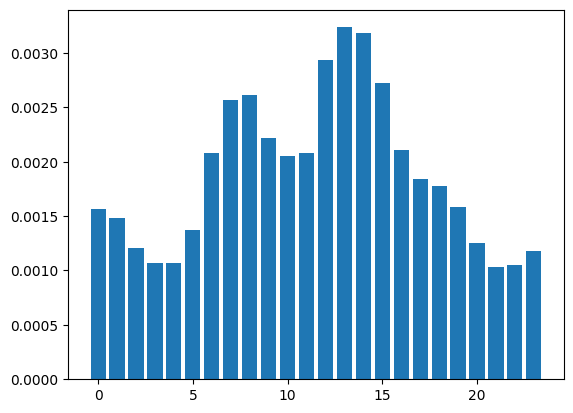

In [22]:
keys = h_list.keys()
values = h_list.values()

plt.bar(keys, values)

In [23]:
df.loc[df['asian_range'] > 0.003]

,index,time,ask_o,ask_h,ask_l,ask_c,date,day,week,year,month,daily_range,asian_range,london_range,ny_range,hourly_range
7,35,4,1.44241,1.44444,1.44198,1.44279,2010-01-05,Tuesday,1,2010,1,0.01093,0.00568,0.00568,0.00253,0.00246
8,36,5,1.44276,1.44740,1.44172,1.44645,2010-01-05,Tuesday,1,2010,1,0.01093,0.00568,0.00568,0.00253,0.00568
9,44,13,1.44372,1.44465,1.44212,1.44270,2010-01-05,Tuesday,1,2010,1,0.01093,0.00568,0.00568,0.00253,0.00253
10,51,20,1.43695,1.43737,1.43653,1.43676,2010-01-05,Tuesday,1,2010,1,0.01093,0.00568,0.00568,0.00253,0.00084
11,52,21,1.43678,1.43743,1.43647,1.43660,2010-01-05,Tuesday,1,2010,1,0.01093,0.00568,0.00568,0.00253,0.00096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14725,227,11,1.22142,1.22164,1.21933,1.21955,2020-12-28,Monday,52,2020,12,0.10695,0.10186,0.10592,0.10474,0.00231
14726,228,12,1.21953,1.22093,1.21921,1.22092,2020-12-28,Monday,52,2020,12,0.10695,0.10186,0.10592,0.10474,0.00172
14727,232,16,1.22155,1.22298,1.22131,1.22136,2020-12-28,Monday,52,2020,12,0.10695,0.10186,0.10592,0.10474,0.00167
14728,233,17,1.22137,1.22173,1.22060,1.22071,2020-12-28,Monday,52,2020,12,0.10695,0.10186,0.10592,0.10474,0.00113


In [24]:

# loop through every single day given that asian range is 10 pips or less
# divide london_range by daily_range to get decimal, then take average of all these values                           


h_list = dict()



h_range = df.loc[(df['asian_range'] < 0.001) & (df['time'] == 0) , 'ny_range'].mean()

h_list[1] = h_range

h_range = df.loc[(df['asian_range'] < 0.002) & (df['asian_range'] > 0.001) & (df['time'] == 0) , 'ny_range'].mean()

h_list[2] = h_range

h_range = df.loc[(df['asian_range'] < 0.003) & (df['asian_range'] > 0.002) & (df['time'] == 0) , 'ny_range'].mean()

h_list[3] = h_range

h_range = df.loc[(df['asian_range'] < 0.004) & (df['asian_range'] > 0.003) & (df['time'] == 0) , 'ny_range'].mean()

h_list[4] = h_range











0

0

<BarContainer object of 4 artists>

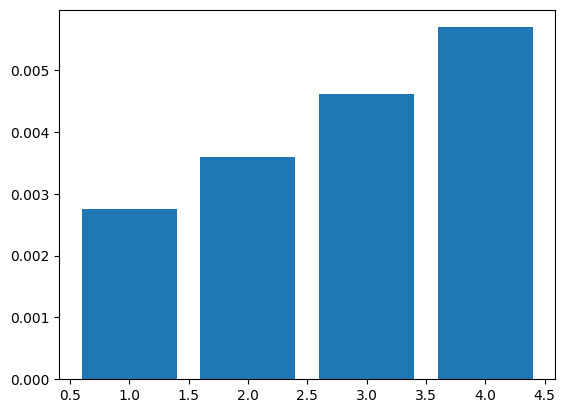

In [25]:

keys = h_list.keys()
values = h_list.values()

plt.bar(keys, values)


In [26]:
h_range = df.loc[(df['daily_range'] > 0.006) & (df['time'] == 0) , 'month']
h_range


64        1
75        1
92        1
172       2
240       3
         ..
14193     7
14218     8
14481    10
14575    11
14600    11
Name: month, Length: 357, dtype: int64

In [27]:


counter=collections.Counter(h_range)


day_dic = dict(counter)

day_dic

{1: 32,
 2: 19,
 3: 48,
 4: 31,
 5: 34,
 6: 32,
 7: 36,
 8: 26,
 9: 23,
 10: 33,
 11: 23,
 12: 20}

<function matplotlib.pyplot.show(close=None, block=None)>

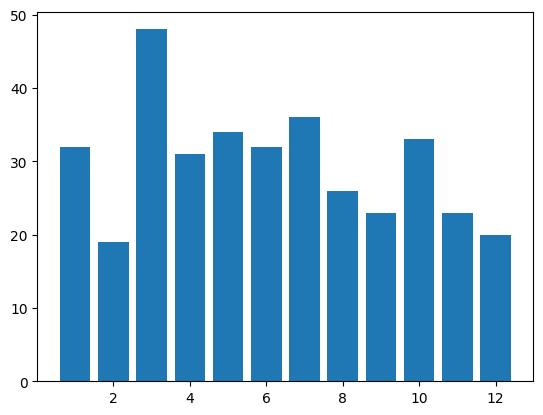

In [28]:
plt.bar(day_dic.keys(), day_dic.values())
plt.show